# Basic analysis of crime data in Seattle and San Francisco

This notebook shows a basic analysis of crime data for the Summer of 2014 in Seattle and San Francisco. We are mainly concerned with finding general patterns to determine at what time are crimes commited more commonly, and what type of crimes are committed.

## Data load and cleanup
The following code loads the data contained in both files **seattle_incidents_summer_2014.csv** and **sanfrancisco_incidents_summer_2014.csv**. Basic libraries that we are going to need for the analysis are also loaded here. 

In [1]:
library(data.table)
library(dplyr)
library(bit64)
library(ggplot2)
seattleData <- fread(input = "seattle_incidents_summer_2014.csv")
sanfranciscoData <- fread(input = "sanfrancisco_incidents_summer_2014.csv")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:data.table’:

    setattr

The following object is masked from ‘package:base’:

    xor

Attaching package bit64
package:bit64 (c) 2011-2012 Jens Oehlschlaegel
creators: integer64 seq :
coercion: as.integer64 as.vector as.logical as.integer as.double as.character as.bin
logical operator: ! & | xor != == < <= >= >
a

For the seattle data, the time is included as part of the **Occurred Date or Date Range Start** field, as a string character that also contains the date in the format "mm/dd/YYYY hh:mm:ss AM/PM", so we need are going to extract the **Hour** information and make sure it is an a 24-h format. The San Francisco data already includes a **Time** field in 24h format, but we are adding a new column with just the hour to allow for comparison.

In [2]:
seattleDT = as.data.table(seattleData)
seattleDT$Hour <- as.integer(substr(seattleDT$`Occurred Date or Date Range Start`, 12,13)) 
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 1] <- 13
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 2] <- 14
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 3] <- 15
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 4] <- 16
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 5] <- 17
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 6] <- 18
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 7] <- 19
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 8] <- 20
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 9] <- 21
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 10] <- 22
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("PM") & seattleDT$Hour == 11] <- 23
seattleDT$Hour[substr(seattleDT$`Occurred Date or Date Range Start`, 21,22) %in% c("AM") & seattleDT$Hour == 12] <- 0

sanfranciscoDT = as.data.table(sanfranciscoData)
sanfranciscoDT$Hour <- as.integer(substr(sanfranciscoData$Time, 1, 2))

## Crime to Hour analysis
First, we want to determine the number of crime occureences at different 1-hour intervals. The following graphic shows the number of crimes committed in Seattle for each hour of the day: (0h-23h)

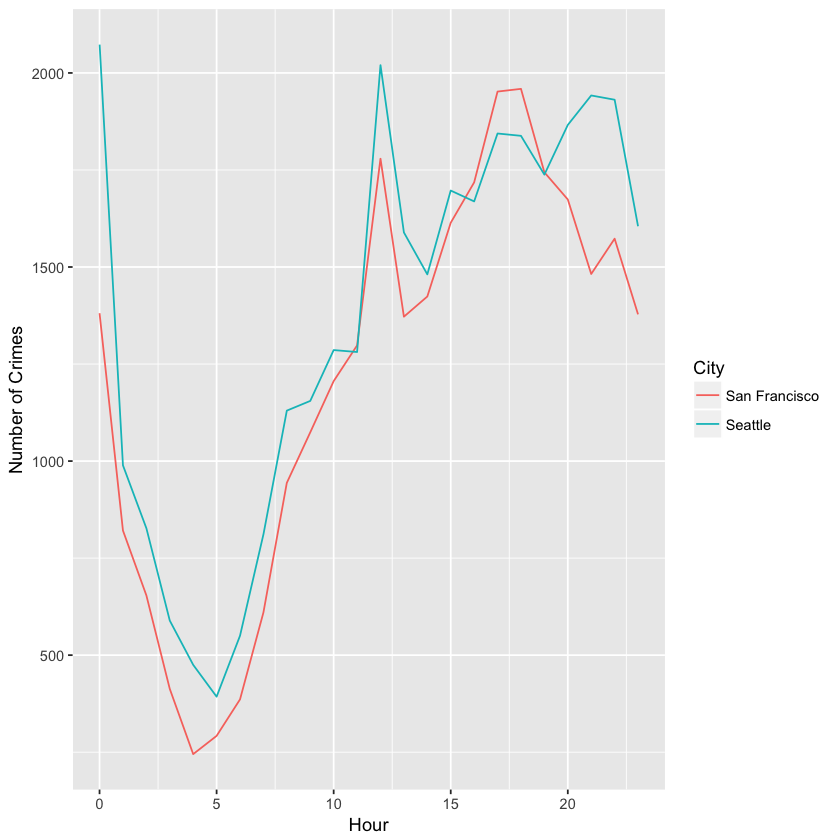

In [3]:
plotDT1 <- seattleDT[, .(`Number of Crimes` = .N, City = "Seattle"), .(Hour)]
plotDT2 <- sanfranciscoDT[, .(`Number of Crimes` = .N, City = "San Francisco"), .(Hour)]
plotDT <- rbind(plotDT1, plotDT2)
ggplot(plotDT,
       aes (x = Hour,
            y = `Number of Crimes`,
            color = City))+
  geom_line()

We can clearly see that both cities follow a similar pattern, with the early morning (4-5 AM) being the least frequent time for crimes committed and rising through the afternoon.

## Type of crimes committed
We are going to break down the previous graph for each city and different type of crime, as they are codified in a different way in each city.

For Seattle, here is a rundown of the different crimes commited at different times of the day:

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


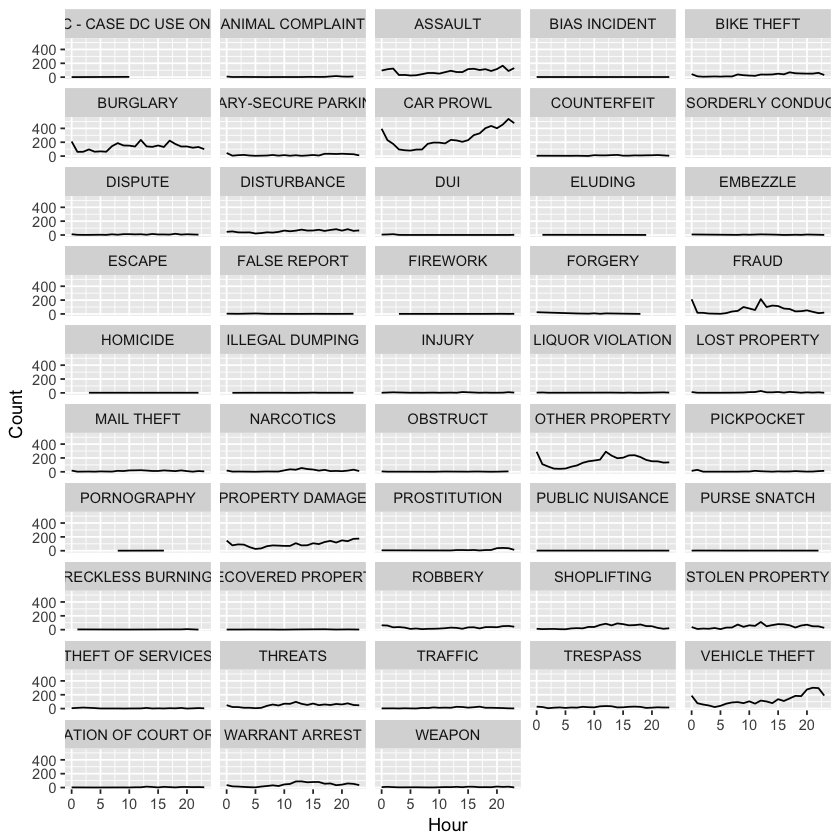

In [5]:
plotDT <- seattleDT[, .(Count = .N), .(Hour, `Summarized Offense Description`)]
ggplot(plotDT,
       aes (x = Hour,
            y = Count))+
  geom_line()+
  facet_wrap(~`Summarized Offense Description`, ncol = 5)

**Car prowl** seems to be the most common crime in Seattle and it's occurrences increase as we approach midnight and follow the general pattern of very few incidents in the early morning. 

Here is the same set of graphs for San Francisco. Notice that the crimes are typified in a different way.

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


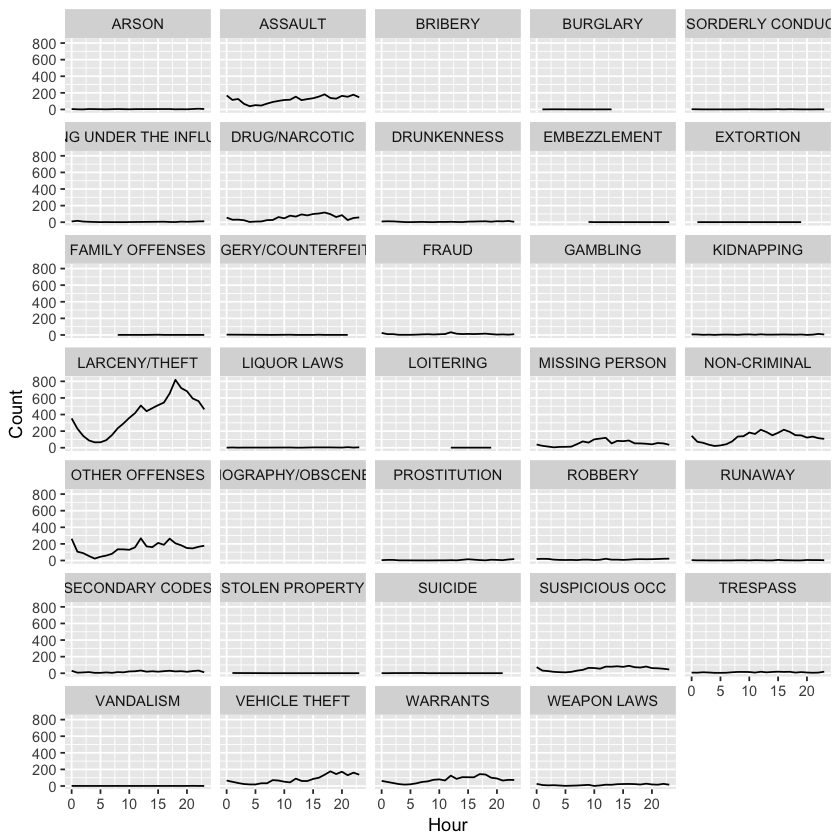

In [6]:
plotDT <- sanfranciscoDT[, .(Count = .N), .(Hour, Category)]

ggplot(plotDT,
       aes (x = Hour,
            y = Count))+
  geom_line()+
  facet_wrap(~Category, ncol = 5)

Here we observer that **Larceny/Theft** follows a similar pattern as **Car Prowl** in Seattle, with less occurrences in the early morning, and rising though the day, although peaking at an earlier hour in comparison.